# TP4 Choix de Thématique - Sofia Valma-Rantisits

## Imports

In [152]:
import os
import textract

### Compter le nombre de mots dans l'ensemble du corpus

In [153]:
# Dans l'ordre : le nombre de lignes, de mots, d'octets.
!wc ../data/all.txt

 20129954  93166932 460921664 ../data/all.txt


## Choix d'une thématique traitée lors de conseils communaux de la Ville de Bruxelles avec rapports annuels _RptAn_ + Mots freq

In [157]:
nb_rap = count_tomes['RptAn']
print(f"{len(files)-nb_rap-1} documents sont des bulletins et {nb_rap} documents sont des rapports annuels")

2690 documents sont des bulletins et 138 documents sont des rapports annuels


In [158]:
# Lister les Fichiers
data_path = "../data/txt/"
files = os.listdir(data_path)

In [159]:
ext = ["RptAn_Part_1.txt", "RptAn_Part_2.txt", "RptAn_Part_3.txt", "RptAn_Part_4.txt", "RptAn_Part_5.txt"
       "RptAn_Part_6.txt", "RptAn_Part_7.txt", "RptAn_Part_8.txt", "RptAn_Part_9.txt"]

In [160]:
# Enlever les fichiers qui ne contiennent pas RptAn
bxl_files = [f for f in files if f.endswith(tuple(ext))]
len(bxl_files)

138

In [161]:
# Lister les fichiers RptAn
bxl_files

['Bxl_1961_Tome_RptAn_Part_4.txt',
 'Bxl_1976_Tome_RptAn_Part_3.txt',
 'Bxl_1972_Tome_RptAn_Part_4.txt',
 'Bxl_1970_Tome_RptAn_Part_1.txt',
 'Bxl_1973_Tome_RptAn_Part_3.txt',
 'Bxl_1969_Tome_RptAn_Part_1.txt',
 'Lkn_1882_Tome_RptAn_Part_1.txt',
 'Lkn_1899_Tome_RptAn_Part_2.txt',
 'Lkn_1874_Tome_RptAn_Part_9.txt',
 'Lkn_1894_Tome_RptAn_Part_1.txt',
 'Bxl_1962_Tome_RptAn_Part_8.txt',
 'Lkn_1901_Tome_RptAn_Part_3.txt',
 'Bxl_1961_Tome_RptAn_Part_8.txt',
 'Lkn_1882_Tome_RptAn_Part_7.txt',
 'Lkn_1874_Tome_RptAn_Part_3.txt',
 'Bxl_1965_Tome_RptAn_Part_2.txt',
 'Bxl_1962_Tome_RptAn_Part_2.txt',
 'Bxl_1975_Tome_RptAn_Part_2.txt',
 'Lkn_1894_Tome_RptAn_Part_3.txt',
 'Bxl_1963_Tome_RptAn_Part_8.txt',
 'Bxl_1975_Tome_RptAn_Part_3.txt',
 'Bxl_1964_Tome_RptAn_Part_2.txt',
 'Bxl_1959_Tome_RptAn_Part_3.txt',
 'Lkn_1901_Tome_RptAn_Part_4.txt',
 'Lkn_1880_Tome_RptAn_Part_8.txt',
 'Bxl_1963_Tome_RptAn_Part_1.txt',
 'Bxl_1978_Tome_RptAn_Part_3.txt',
 'Lkn_1901_Tome_RptAn_Part_7.txt',
 'Lkn_1874_Tome_RptA

In [162]:
from collections import defaultdict
count_decade = defaultdict(int)
count_cities = defaultdict(int)
count_tomes = defaultdict(int)
covered_years = set()

for f in files:
    if "_" in f and f.endswith(tuple(ext)):
        elems = f.split("_")
        city = elems[0]
        year = elems[1]
        tome = elems[3]
        covered_years.add(year)
        decade = year[:3] + "0s"
        count_decade[decade] += 1
        count_cities[city] += 1
        count_tomes[tome] += 1

In [163]:
print(f"Il y a {count_cities['Bxl']} bulletins de Bruxelles and {count_cities['Lkn']} de Laeken")

Il y a 92 bulletins de Bruxelles and 46 de Laeken


In [164]:
# Lister les fichiers de bulletins qui correspondent à Bruxelles
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) if f.endswith(tuple(ext)) if f.startswith('Bxl')]
txts

['Bxl_1961_Tome_RptAn_Part_4.txt',
 'Bxl_1976_Tome_RptAn_Part_3.txt',
 'Bxl_1972_Tome_RptAn_Part_4.txt',
 'Bxl_1970_Tome_RptAn_Part_1.txt',
 'Bxl_1973_Tome_RptAn_Part_3.txt',
 'Bxl_1969_Tome_RptAn_Part_1.txt',
 'Bxl_1962_Tome_RptAn_Part_8.txt',
 'Bxl_1961_Tome_RptAn_Part_8.txt',
 'Bxl_1965_Tome_RptAn_Part_2.txt',
 'Bxl_1962_Tome_RptAn_Part_2.txt',
 'Bxl_1975_Tome_RptAn_Part_2.txt',
 'Bxl_1963_Tome_RptAn_Part_8.txt',
 'Bxl_1975_Tome_RptAn_Part_3.txt',
 'Bxl_1964_Tome_RptAn_Part_2.txt',
 'Bxl_1959_Tome_RptAn_Part_3.txt',
 'Bxl_1963_Tome_RptAn_Part_1.txt',
 'Bxl_1978_Tome_RptAn_Part_3.txt',
 'Bxl_1963_Tome_RptAn_Part_7.txt',
 'Bxl_1972_Tome_RptAn_Part_2.txt',
 'Bxl_1958_Tome_RptAn_Part_8.txt',
 'Bxl_1966_Tome_RptAn_Part_4.txt',
 'Bxl_1960_Tome_RptAn_Part_3.txt',
 'Bxl_1978_Tome_RptAn_Part_2.txt',
 'Bxl_1972_Tome_RptAn_Part_3.txt',
 'Bxl_1970_Tome_RptAn_Part_3.txt',
 'Bxl_1960_Tome_RptAn_Part_7.txt',
 'Bxl_1976_Tome_RptAn_Part_1.txt',
 'Bxl_1960_Tome_RptAn_Part_8.txt',
 'Bxl_1966_Tome_RptA

In [165]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [166]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

92

In [171]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp_tp4'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{ext}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [183]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{ext}.txt'), 'r') as f:
    before = f.read()

## Trouver les mots les plus fréquants dans le corpus pour choisir une thématique

In [2]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Créer une une liste de stopwords

In [3]:
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", 
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "Bruxelles", "bruxelles", "brussel", "Brussel",
      "rue", "Rue", "ville", "voor", "door", "een", "total", "service", "aan", "der"
       "werden", "don", "année", "met", "travaux", "nombre", "die", "totaal", "stad",
       "aantal", "werd", "dienst", "heeft"]
sw = set(sw)

In [4]:
print(f"{len(sw)} stopwords:\n {sorted(sw)}")

223 stopwords:
 ['Brussel', 'Bruxelles', 'Rue', 'aan', 'aantal', 'ai', 'aie', 'aient', 'aies', 'ainsi', 'ait', 'année', 'après', 'as', 'au', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'autre', 'autres', 'aux', 'avaient', 'avais', 'avait', 'avec', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'bien', 'brussel', 'bruxelles', 'c', 'ce', 'cela', 'celle', 'ces', 'cet', 'cette', 'comme', 'contre', 'd', 'dans', 'de', 'depuis', 'derwerden', 'des', 'deux', 'die', 'dienst', 'dire', 'dit', 'doit', 'don', 'donc', 'dont', 'door', 'du', 'een', 'elle', 'en', 'encore', 'entre', 'es', 'est', 'et', 'eu', 'eue', 'eues', 'eurent', 'eus', 'eusse', 'eussent', 'eusses', 'eussiez', 'eussions', 'eut', 'eux', 'eûmes', 'eût', 'eûtes', 'faire', 'fait', 'faut', 'furent', 'fus', 'fusse', 'fussent', 'fusses', 'fussiez', 'fussions', 'fut', 'fûmes', 'fût', 'fûtes', 'heeft', 'het', 'il', 'il

## Tokeniser

In [5]:
# Récupération du contenu du fichier
path = "../data/all.txt"
limit = 10**8

with open(path) as f:
    text = f.read()[:limit]

In [6]:
# Tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

24948338 words found


In [7]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

6265092 words kept (154699 different word forms)


In [8]:
fdist = nltk.FreqDist(kept)
fdist.most_common(50)

[('conseil', 45918),
 ('francs', 45478),
 ('collège', 35958),
 ('section', 29249),
 ('art', 27248),
 ('bourgmestre', 25401),
 ('administration', 21734),
 ('rapport', 21363),
 ('messieurs', 17023),
 ('demande', 15947),
 ('hospices', 15766),
 ('question', 15632),
 ('frais', 15585),
 ('echevin', 15466),
 ('somme', 14290),
 ('communal', 14145),
 ('séance', 14037),
 ('prix', 14015),
 ('dépenses', 13878),
 ('avis', 13163),
 ('finances', 13053),
 ('place', 13042),
 ('projet', 13019),
 ('lieu', 12957),
 ('budget', 12939),
 ('partie', 12698),
 ('proposition', 12577),
 ('publique', 12527),
 ('compte', 12323),
 ('police', 12227),
 ('droit', 11440),
 ('honorable', 11196),
 ('dépense', 9764),
 ('loi', 9702),
 ('point', 9545),
 ('publics', 9441),
 ('terrain', 9233),
 ('société', 9166),
 ('heures', 9099),
 ('communale', 8864),
 ('cas', 8814),
 ('grand', 8684),
 ('jour', 8681),
 ('école', 8663),
 ('mois', 8657),
 ('enfants', 8623),
 ('recettes', 8575),
 ('saint', 8530),
 ('ans', 8523),
 ('propose', 83

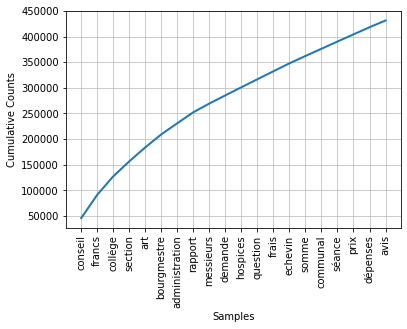

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [9]:
# Plot: les n mots les plus fréquents
n = 20
fdist.plot(n, cumulative=True)

## La thématique choisi se base sur les mots fréquants : `art` et `travaux` et `section` : Les travaux et discussions sur le secteur de l'art à Bruxelles de 1847 à 1901